# Clasificación para enfermedad cardíaca

Se va a construir un modelo que sea capaz de identificar si una persona padece de alguna enfermedad cardíaca de acuerdo a las características médicas que presenten, mediante el uso de métodos de Python relacionados con el Machine Learning.

## Datos
Los datos utilizados durante el modelamiento son provenientes del UCI Machine Learning Repository https://archive.ics.uci.edu/ml/index.php.

**La descripción de los datos es la siguiente**

    1. age - edad (en años)
    2. sex - sexo(1 = masculino; 0 = femenino)
    3. cp - tipo de dolor de pecho
        * 0: Angina típica: dolor de pecho relacionado a la disminución del suministro sanguíneo al corazón
        * 1: Angina atípica: dolor de pecho no relacionado con el corazón
        * 2: Dolor no anginal: típicamente espasmos esofagenales (no relacionado al corazón)
        * 3: Asintomático: Dolor de pecho que no muestra señales de enfermedad
    4. trestbps - presión sanguínea en reposo (en mmHg al ingreso del hospital). Valores por encima de 130 - 140 es típicamente                   motivo de preocupación. 
    5. chol - sérum de colesterol en mg/dl
        * sérum = LDL + HDL + .2*triglycerides
        * por encima de 200 es motivo de preocupación
    6. fbs - glucemia en ayunas > 120 mg/dl (1 = true; 0 = false)
        * '>126' mg/dL señal de diabetes
    7. restecg - resultados rescatados del electrocardiograma
        * 0: Nada a notar
        * 1: Anormalidad en Onda ST-T
            * puede variar de síntomas leves a problemas severos
            * Señales de látidos cardíacos no normales
    8. thalach - Máxima frecuencia cardíaca alcanzada
    9. exang - angina introducida por ejercicio (1 = yes; 0 = no)
    10. oldpeak - Depresión ST inducida por ejercicio relacionado al reposo
    11. slope - la pendiente del segmento ST de ejercicio pico
        * 0: Upsloping: mejor frecuencia cardíaca con ejercicio (poco común)
        * 1: Flatsloping: cambio mínimo (típicamente un corazón saludable)
        * 2: Downsloping: señal de un corazón malsano
    12. ca - número de vasos sanguíneos importantes (0-3) con color por fluorosopía
        * vasos con color: el doctor puede ver la sangre pasando a través de ellos
        * mientras más movimiento sanguíneo, mejor (sin coágulos)
    13. thal - resultado de estrés con talio
        * 1,3: normal
        * 6: defecto fijo: usado por defecto pero seguro por el momento
        * 7: defecto reversible: no existe un apropiado movimiento sanguíneo al momento de ejercitarse
    14. target
        * 0: sin enfermedad
        * 1: con enfermedad

## Preparación de herramientas
Se utilizarán las librerías de Pandas, Matplotlib y NumPy.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# para la elaboración de gráficas
import seaborn as sns

# para que las gráficas aparezcan dentro del jupyter notebook
%matplotlib inline

# Modelos a utilizar
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Evaluación de modelos
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score

## Cargamos los datos

In [3]:
df = pd.read_csv('heart-disease.csv')

## Análisis exploratorio

In [4]:
df.shape

(303, 14)

In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [7]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

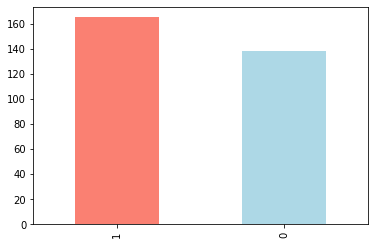

In [8]:
df['target'].value_counts().plot(kind='bar', color=['salmon', 'lightblue'])

Podemos observar que del dataset que tenemos, la mayoría de los casos indican que las personas poseen una enfermedad cardíaca (165) en relación a las personas que no poseen una enfermedad cardíaca (138)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [10]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [11]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Frecuencia de enfermedad cardíaca según el sexo de la persona

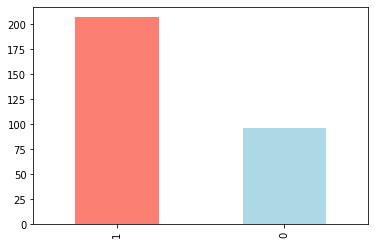

In [12]:
df['sex'].value_counts().plot(kind='bar', color=['salmon', 'lightblue'])

In [13]:
df['sex'].value_counts()

1    207
0     96
Name: sex, dtype: int64

In [14]:
# Realizamos un crosstab para comparar sexo con enfermedad cardíaca
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


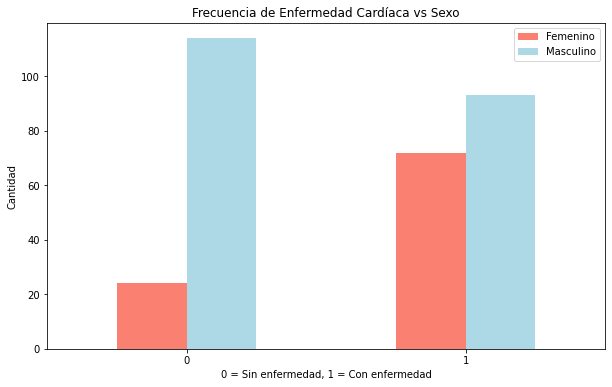

In [15]:
pd.crosstab(df.target, df.sex).plot(kind='bar',
                                    figsize=(10, 6),
                                    color=['salmon','lightblue'])

plt.title('Frecuencia de Enfermedad Cardíaca vs Sexo')
plt.xlabel('0 = Sin enfermedad, 1 = Con enfermedad')
plt.ylabel('Cantidad')
plt.legend(['Femenino', 'Masculino']);
plt.xticks(rotation=0);

En la gráfica mostrada se puede ver que existen más hombres que mujeres con enfermedad cardíaca, sin embargo es mayor el porcentaje de presencia de enfermedad cardíaca en el grupo de mujeres que en el grupo de hombres (75% y 45% respectivamente)

### Edad vs Máximo HR para enfermedad cardíaca

Text(0, 0.5, 'Máximo HR')

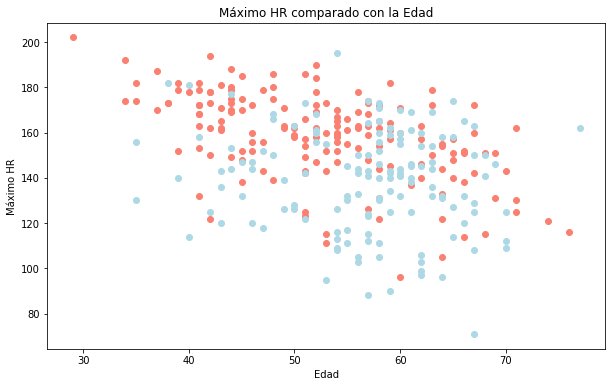

In [16]:
plt.figure(figsize=(10,6))

# Gráfica con positivo para enfermedad cardíaca
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            c='salmon')

# Gráfica con negativo para enfermedad cardíaca
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c='lightblue')

# Añadiendo stylers
plt.title('Máximo HR comparado con la Edad')
plt.xlabel('Edad')
plt.ylabel('Máximo HR')

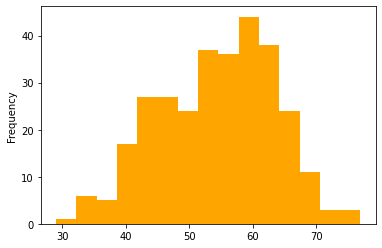

In [17]:
# Histograma para la Edad
df.age.plot.hist(bins=15,
                 color = 'orange')

Entre las edades de 50 y 65 años se muestra una mayor cantidad de casos positivos.

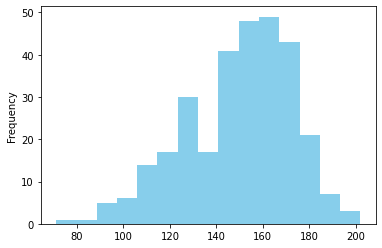

In [18]:
# Histograma para el Máximo HR

df.thalach.plot.hist(bins=15,
                     color='skyblue')

Alrededor de los valores de 150 y 170 para las frecuencias cardíacas máximas alcanzadas se encuentra una mayor concentración de casos positivos para una enfermedad cardíaca.

### Frecuencia de enfermedad cardíaca para distintos tipos de Dolor de Pecho

In [19]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

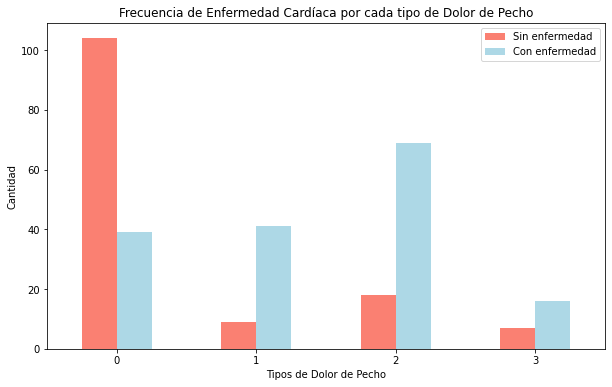

In [20]:
pd.crosstab(df.cp, df.target).plot(kind='bar',
                                   figsize=(10,6),
                                   color=['salmon','lightblue'])

plt.title('Frecuencia de Enfermedad Cardíaca por cada tipo de Dolor de Pecho')
plt.xlabel('Tipos de Dolor de Pecho')
plt.ylabel('Cantidad')
plt.legend(['Sin enfermedad', 'Con enfermedad'])
plt.xticks(rotation=0)

De acuerdo a los datos, se muestra una mayor presencia de enfermedades cardíacas para el conjunto de personas que presentaron un dolor no angial, el cual es típicamente relacionado con los espasmos esofagenales, seguido de los dolores de angina atípica, angina típica y dolores asintomáticos.

A continuación se muestran los porcentajes relacionados a los casos positivos de enfermedad cardíaca de acuerdo al tipo de dolor que presentaron las personas:
    
    * Angina típica = 27.3%
    * Angina atípica = 82.0%
    * Dolor no anginal = 79.3%
    * Dolor asintomático = 69.5%

Podemos observar que para las personas que presentan los dolores de tipo 1, 2 y 3 son las que muestran una mayor probabilidad de poseer una enfermedad cardíaca con respecto al conjunto de datos analizado.

## Matriz de Correlación 
Utilizamos una matriz de correlación para poder verificar la relación entre las variables independientes de mis datos

In [22]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


(14.5, -0.5)

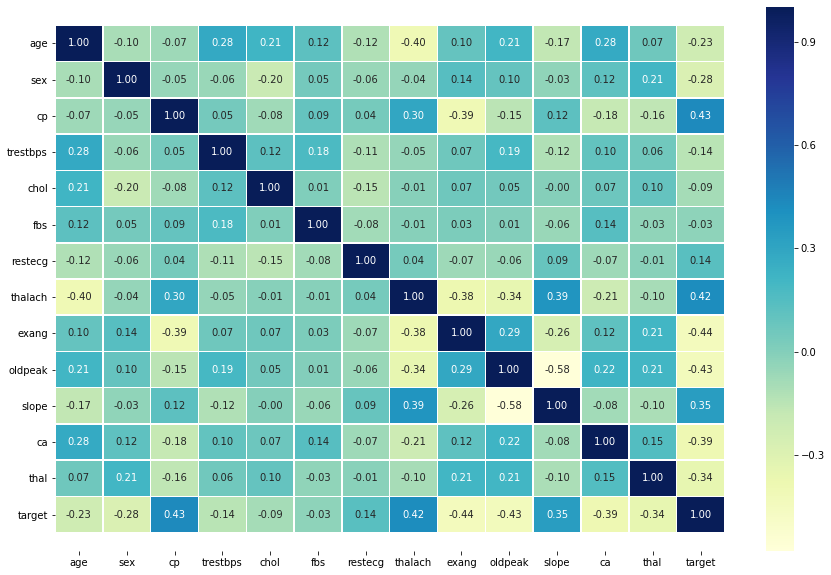

In [23]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidth=0.5,
                 fmt='.2f',
                 cmap='YlGnBu')

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

## Modelamiento

In [24]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [25]:
# Dividimos la data en X e y
X = df.drop('target', axis=1)
y = df['target']

In [26]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [27]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [28]:
y.tail()

298    0
299    0
300    0
301    0
302    0
Name: target, dtype: int64

In [29]:
len(X)

303

In [30]:
len(y)

303

In [31]:
# Dividimos datos en el conjunto de entrenamiento y el conjunto de prueba
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

In [32]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [33]:
y_train

132    1
202    0
196    0
75     1
176    0
      ..
188    0
71     1
106    1
270    0
102    1
Name: target, Length: 242, dtype: int64

Se utilizaran 3 modelos diferentes en el conjunto de entrenamiento:
    1. Logistic Regression
    2. K-Nearest Neighbours Classifier
    3. Random Forest Classifier

In [34]:
# Colocamos los modelos en un diccionario
models = {'Logistic Regression': LogisticRegression(),
          'KNN': KNeighborsClassifier(),
          'Random Forest': RandomForestClassifier()}

# Creamos una fit function para ajustar el modelo a los datos y que los evalúe según el output
def fit_and_score(models, X_train, X_test, y_train, y_test):
    
    np.random.seed(42)
    
    model_scores = {}
    
    for name, model in models.items():
        model.fit(X_train, y_train)
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [35]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)

model_scores

C:\Users\Joseph Baquerizo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Joseph Baquerizo\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


{'Logistic Regression': 0.8688524590163934,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8524590163934426}

## Comparamos los modelos

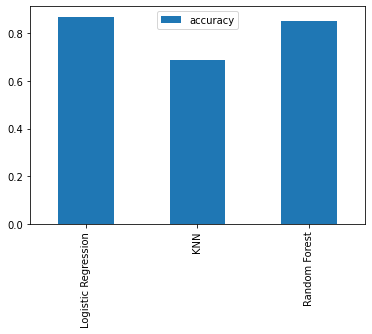

In [37]:
model_compare = pd.DataFrame(model_scores, index=['accuracy'])
model_compare.T.plot.bar();

Hemos obtenido un modelo base de acuerdo al score obtenido. Ahora, procederemos a mejorar dicho modelo por medio de Hyperparameter Tuning.

## Hyperparameter Tuning

In [39]:
# Usando KNN

train_scores = []
test_scores = []

# Creando una lista para distintos valores de n_neighbors, el valor por default es 5, sin embargo vamos a probar con valores de
# 1 al 20

neighbors = range(1, 21)

#Instanciamos el KNN

knn = KNeighborsClassifier()

# Loop en diferentes n_neighbors

for i in neighbors:
    knn.set_params(n_neighbors=i)
    knn.fit(X_train, y_train)
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))

In [40]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [41]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Max KNN score en el test data: 75.41%


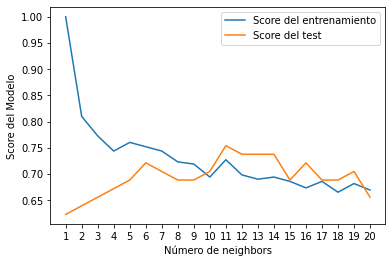

In [45]:
plt.plot(neighbors, train_scores, label='Score del entrenamiento')
plt.plot(neighbors, test_scores, label='Score del test')
plt.xticks(np.arange(1, 21, 1))
plt.xlabel('Número de neighbors')
plt.ylabel('Score del Modelo')
plt.legend()

print(f'Max KNN score en el test data: {max(test_scores)*100:.2f}%')

## Hyper Parameter tuning con RandomizedSearchCV

Es una forma de parámetros para el tuning de los modelos de manera aleatoria.

In [50]:
# Creamos un grid de hiperparámetros para el Logistic Regression
log_reg_grid = {'C': np.logspace(-4, 4, 20),
                'solver': ['liblinear']}

# Creamos un grid de hiperparámetros para el RandomForestClassifier
rf_grid = {'n_estimators': np.arange(10, 1000, 50),
           'max_depth': [None, 3, 5, 10],
           'min_samples_split': np.arange(2, 20, 2),
           'min_samples_leaf': np.arange(1, 20, 2)}

In [47]:
# Aplicando Tuning a LogisticRegression

np.random.seed(42)

# Usando una búsqueda de hiperparámetros aleatoria para el Logistic Regression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit de los hiperparámetros aleatorios para el modelo de LogisticRegression
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.6s finished
C:\Users\Joseph Baquerizo\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='warn', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='warn', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='warn', n_iter=20, n_jobs=None,
                   param_distributi...
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+0

In [48]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [49]:
rs_log_reg.score(X_test, y_test)

0.8852459016393442

Sólo hemos usado el tuning en 2 hiperparámetros y obtuvimos una mejora. Ahora procedemos a realizar lo mismo con el RandomForestClassifier

In [51]:
# Seteamos la semilla aleatoria
np.random.seed(42)

# Seteamos la búsqueda de hiperparámetros para el Random Forest Classifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

# Fit del modelo
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   51.9s finished
C:\Users\Joseph Baquerizo\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=None

In [52]:
# Verificamos los mejores hiperparámetros
rs_rf.best_params_

{'n_estimators': 560,
 'min_samples_split': 12,
 'min_samples_leaf': 15,
 'max_depth': 3}

In [53]:
# Evaluamos el RandomizedSearchCV del RandomForestClassifier
rs_rf.score(X_test, y_test)

0.8688524590163934

## Aplicamos GridSearchCV (un análisis más exhaustivo del RandomizedSearchCV)

Para esto nos enfocaremos en el uso de este método de tuning de hiperparámetros en el modelo de LogisticRegression

In [54]:
log_reg_grid = {'C': np.logspace(-4, 4, 30),
                'solver': ['liblinear']}

# Setup del grid de hiperparámetros
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

# Fit al modelo
gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.9s finished
C:\Users\Joseph Baquerizo\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': array([1.0000000...
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.

In [55]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [56]:
# Evaluar
gs_log_reg.score(X_test, y_test)

0.8852459016393442

In [57]:
## Evaluando el modelo más alla de la exactitud
y_preds = gs_log_reg.predict(X_test)

In [70]:
len(y_preds)

61

In [59]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

In [62]:
# Importamos la ROC curve
from sklearn.metrics import auc, roc_curve

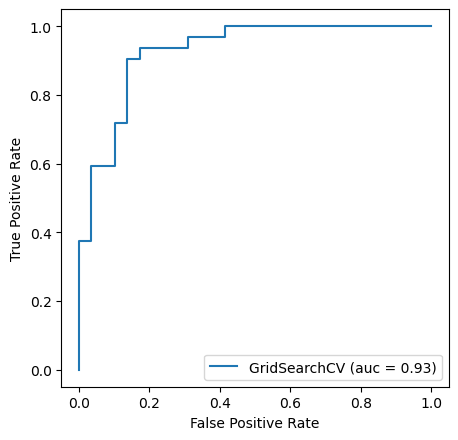

In [78]:
logistic_fpr, logistic_tpr, treshold = roc_curve(y_test, gs_log_reg.decision_function(X_test))
auc_logistic = auc(logistic_fpr, logistic_tpr)

plt.figure(figsize=(5,5), dpi=100)
plt.plot(logistic_fpr, logistic_tpr, label='GridSearchCV (auc = %0.2f)' % auc_logistic)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()

plt.show()

In [79]:
# Confusion matrix
print(confusion_matrix(y_test, y_preds))

[[25  4]
 [ 3 29]]


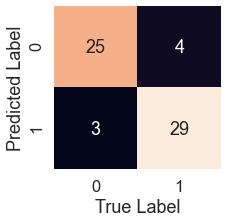

In [84]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     cbar=False)
    plt.xlabel('True Label')
    plt.ylabel('Predicted Label')
    
    #bottom, top = ax.get_ylim()
    #ax.set_ylim(bottom + 0.5, top - 0.5)

plot_conf_mat(y_test, y_preds)

In [85]:
# Reporte de clasificación
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [87]:
# Ahora calculará las métricas de evaluación con Cross Validation (precision, recall, f1-score), revisando 
# los mejores hiperparámetros
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [89]:
clf = LogisticRegression(C=0.20433597178569418,
                         solver='liblinear')

In [90]:
cv_acc = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring='accuracy')
cv_acc

array([0.81967213, 0.90163934, 0.86885246, 0.88333333, 0.75      ])

In [92]:
cv_acc = np.mean(cv_acc)
cv_acc

0.8446994535519124

In [93]:
cv_precision = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring='precision')
cv_precision = np.mean(cv_precision)
cv_precision

0.8207936507936507

In [94]:
cv_recall = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring='recall')
cv_recall = np.mean(cv_recall)
cv_recall

0.9212121212121213

In [95]:
cv_f1 = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring='f1')
cv_f1 = np.mean(cv_f1)
cv_f1

0.8673007976269721

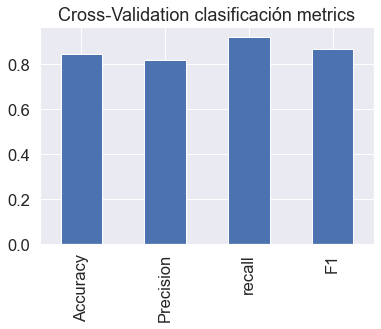

In [97]:
# Visualizar las métricas de cross-validation
cv_metrics = pd.DataFrame({'Accuracy': cv_acc,
                           'Precision': cv_precision,
                           'recall': cv_recall,
                           'F1': cv_f1},
                           index=[0])
cv_metrics.T.plot.bar(title='Cross-Validation clasificación metrics',
                      legend=False)

## Importancia de Features
Se determina qué features contribuyen más al output del modelo y cómo contribuyeron.

In [99]:
# Fit an instance of LogisaticRegression
clf = LogisticRegression(C=0.20433597178569418, 
                         solver='liblinear')

clf.fit(X_train, y_train);

In [100]:
clf.coef_

array([[ 0.00316728, -0.86044651,  0.66067041, -0.01156993, -0.00166374,
         0.04386107,  0.31275847,  0.02459361, -0.6041308 , -0.56862804,
         0.45051628, -0.63609897, -0.67663373]])

In [102]:
# Match coef's of features to columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.0031672801993431563,
 'sex': -0.8604465072345515,
 'cp': 0.6606704082033799,
 'trestbps': -0.01156993168080875,
 'chol': -0.001663744504776871,
 'fbs': 0.043861071652469864,
 'restecg': 0.31275846822418324,
 'thalach': 0.024593613737779126,
 'exang': -0.6041308000615746,
 'oldpeak': -0.5686280368396555,
 'slope': 0.4505162797258308,
 'ca': -0.6360989676086223,
 'thal': -0.6766337263029825}

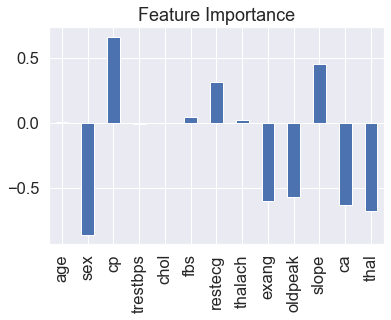

In [103]:
# Visualize feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title='Feature Importance', legend=False)

In [104]:
pd.crosstab(df['slope'], df['target'])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


El resultado del modelo se presenta en las evaluaciones mostradas anteriormente, se obtuvo un buen conjunto de predicciones para nuestra data de test, sin embargo sólo se aplicó el tuning de 2 hiperparámetros y relativamente pocos casos para el GridSearchCV. Se puede mejorar el resultado del entrenamiento evaluando otros modelos de clasificación o ajustando diferentes hiperparámetros, distintos conjuntos de entrenamiento, entre otros.